<a href="https://colab.research.google.com/github/debugk/PredictPrice/blob/master/PridictPrice_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
input_dir = "/content/gdrive/My Drive/PredictPrice/Input"

files   = ["COMEX_Copper_train", 
           "COMEX_Gold_train", 
           "COMEX_Palladium_train", 
           "COMEX_Platinum_train", 
           "COMEX_Silver_train", 
           "Indices_DXY Curncy_train", 
           "Indices_NKY Index_train", 
           "Indices_SHSZ300 Index_train", 
           "Indices_SPX Index_train", 
           "Indices_SX5E Index_train", 
           "Indices_UKX Index_train", 
           "Indices_VIX Index_train", 
           "LMEAluminium3M_train", 
           "LMECopper3M_train", 
           "LMELead3M_train", 
           "LMENickel3M_train", 
           "LMETin3M_train", 
           "LMEZinc3M_train", 
           "LMEAluminium_OI_train", 
           "LMECopper_OI_train", 
           "LMELead_OI_train", 
           "LMENickel_OI_train", 
           "LMETin_OI_train", 
           "LMEZinc_OI_train",
           "Label_LMEAluminium_train_1d", 
           "Label_LMEAluminium_train_20d", 
           "Label_LMEAluminium_train_60d", 
           "Label_LMECopper_train_1d", 
           "Label_LMECopper_train_20d", 
           "Label_LMECopper_train_60d", 
           "Label_LMELead_train_1d", 
           "Label_LMELead_train_20d", 
           "Label_LMELead_train_60d", 
           "Label_LMENickel_train_1d", 
           "Label_LMENickel_train_20d", 
           "Label_LMENickel_train_60d", 
           "Label_LMETin_train_1d", 
           "Label_LMETin_train_20d", 
           "Label_LMETin_train_60d", 
           "Label_LMEZinc_train_1d", 
           "Label_LMEZinc_train_20d", 
           "Label_LMEZinc_train_60d"]


df_dict = {}

for file_name in files:
    df_dict[file_name] = pd.read_csv("%s/Train/Train_data/%s.csv"%(input_dir, file_name), parse_dates=True,  index_col=1)


In [0]:
def ShowPrice(dfs, labels, price='Open'):
  f  = plt.figure(figsize=[10,7])
  ax = f.add_subplot(1,1,1)

  for i in range(len(dfs)):
    ax.plot(dfs[i][price], label=labels[i])
  
  ax.legend(loc='best')
  ax.grid(True)
 

In [0]:
def ShowRelativePrice(dfs, labels, price='Open'):
  f  = plt.figure(figsize=[10,7])
  ax = f.add_subplot(1,1,1)

  for i in range(len(dfs)):
    ax.plot(dfs[i][price]/dfs[i][price].min(), label=labels[i])
  
  ax.legend(loc='best')
  ax.grid(True)
 

In [0]:
show_list = ["COMEX_Copper_train", 
           "COMEX_Gold_train", 
           "COMEX_Palladium_train", 
           "COMEX_Platinum_train", 
           "COMEX_Silver_train"]

comex_list = []

for file_name in show_list:
  comex_list += [df_dict[file_name].dropna()]

labels = ['Copper', 'Gold', 'Palladium','Platinum', 'Silver']

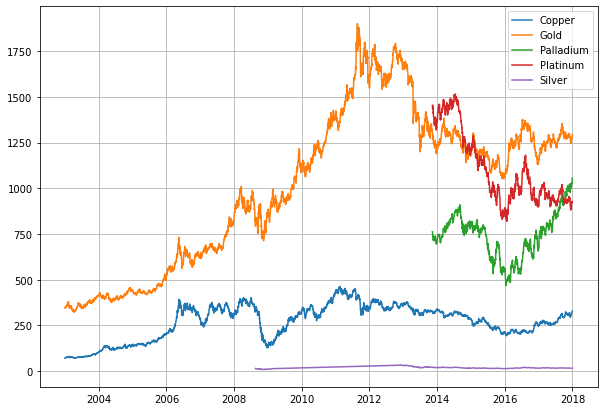

In [14]:
ShowPrice(comex_list, labels)

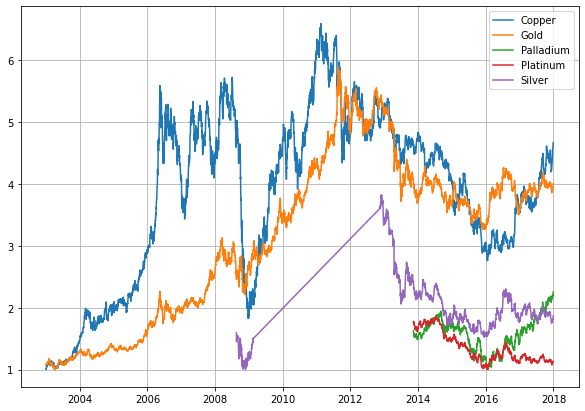

In [16]:
ShowRelativePrice(comex_list, labels)